## Pandas十分钟入门

### 这是一份面向新用户的Pandas简要介绍。想要学习更深入的内容请进入<a herf>http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook</a>
### 通常，我们先导入如下内容：

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


## 1.创建对象

### 详情参见[Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

### 我们可以通过传入一个列表对象来创建Series，pandas会默认为其创建整数索引：

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 同样，通过传入一个numpy矩阵、时间索引和列标签来创建DataFrame：

In [5]:
dates = pd.date_range('20180101', periods=6)

In [6]:
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2018-01-01,1.213726,1.223995,-0.514832,-1.373114
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-03,0.733697,-1.623424,0.265715,0.505009
2018-01-04,-0.175506,-0.404253,0.725063,-0.029984
2018-01-05,-2.081784,-0.847961,-0.187492,-2.720050
2018-01-06,-0.216038,1.482802,0.410181,-0.669965


### 也可以通过传入一个能够被转换成形似Series结构的字典对象来创建DataFrame。

In [12]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20180102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [13]:
df2

,A,B,C,D,E,F
0,1.0,2018-01-02,1.0,3,test,foo
1,1.0,2018-01-02,1.0,3,train,foo
2,1.0,2018-01-02,1.0,3,test,foo
3,1.0,2018-01-02,1.0,3,train,foo


### 查看各列的数据类型：

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 如果你使用的是IPython，使用Tab键可以自动补全功能命令，下图中是此功能的示例：

df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_fibeta
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D

### 可以看到，df2的A，B，C，D乃至E列都在可以被Tab自动补全，受篇幅所限，其他内容省略显示。

## 2.查看数据
### 详情参见[Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

### 分别查看数据的最前、最后几行：

In [10]:
df.head()

,A,B,C,D
2018-01-01,1.213726,1.223995,-0.514832,-1.373114
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-03,0.733697,-1.623424,0.265715,0.505009
2018-01-04,-0.175506,-0.404253,0.725063,-0.029984
2018-01-05,-2.081784,-0.847961,-0.187492,-2.720050


In [9]:
df.tail(3)

,A,B,C,D
2018-01-04,-0.175506,-0.404253,0.725063,-0.029984
2018-01-05,-2.081784,-0.847961,-0.187492,-2.720050
2018-01-06,-0.216038,1.482802,0.410181,-0.669965


### 显示数据的索引（index），列名（column）和取值（value）：

In [15]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 1.21372622,  1.22399486, -0.5148324 , -1.37311402],
       [ 1.45667538, -0.00985463, -0.69173895,  0.40386356],
       [ 0.73369744, -1.62342358,  0.26571529,  0.50500891],
       [-0.17550552, -0.40425299,  0.72506331, -0.02998398],
       [-2.08178366, -0.84796051, -0.18749204, -2.72004962],
       [-0.2160383 ,  1.48280168,  0.41018092, -0.66996496]])

### describe用于显示数据的快速统计汇总：

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.155129,-0.029783,0.001149,-0.647373
std,1.296168,1.200800,0.555566,1.235917
min,-2.081784,-1.623424,-0.691739,-2.720050
25%,-0.205905,-0.737034,-0.432997,-1.197327
50%,0.279096,-0.207054,0.039112,-0.349974
75%,1.093719,0.915532,0.374065,0.295402
max,1.456675,1.482802,0.725063,0.505009


### 对数据进行转置：

In [19]:
df.T

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00
A,1.213726,1.456675,0.733697,-0.175506,-2.081784,-0.216038
B,1.223995,-0.009855,-1.623424,-0.404253,-0.847961,1.482802
C,-0.514832,-0.691739,0.265715,0.725063,-0.187492,0.410181
D,-1.373114,0.403864,0.505009,-0.029984,-2.720050,-0.669965


### 将数据按照轴来排序（axis表示轴的维度，axis=0表示行，axis=1表示列）：

In [20]:
 df.sort_index(axis=1, ascending=False)

,D,C,B,A
2018-01-01,-1.373114,-0.514832,1.223995,1.213726
2018-01-02,0.403864,-0.691739,-0.009855,1.456675
2018-01-03,0.505009,0.265715,-1.623424,0.733697
2018-01-04,-0.029984,0.725063,-0.404253,-0.175506
2018-01-05,-2.720050,-0.187492,-0.847961,-2.081784
2018-01-06,-0.669965,0.410181,1.482802,-0.216038


### 将数据按照值排序：

In [21]:
df.sort_values(by='B')

,A,B,C,D
2018-01-03,0.733697,-1.623424,0.265715,0.505009
2018-01-05,-2.081784,-0.847961,-0.187492,-2.720050
2018-01-04,-0.175506,-0.404253,0.725063,-0.029984
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-01,1.213726,1.223995,-0.514832,-1.373114
2018-01-06,-0.216038,1.482802,0.410181,-0.669965


## 3.选择


> 注意：虽然Python标准库和Numpy的选择和设置表达式也能直接使用，但是作为产品代码，我们推荐使用经过优化的pandas数据访问方式： .at, .iat, .loc, .iloc 和 .ix

### 详情参见[Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)和[MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)
### 3.1 获取

### 选择单列，将返回一个Series序列，等价于df.A：

In [22]:
df['A']

2018-01-01    1.213726
2018-01-02    1.456675
2018-01-03    0.733697
2018-01-04   -0.175506
2018-01-05   -2.081784
2018-01-06   -0.216038
Freq: D, Name: A, dtype: float64

### 通过[ ]来选择，对行进行切片：

In [23]:
df[0:3]

,A,B,C,D
2018-01-01,1.213726,1.223995,-0.514832,-1.373114
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-03,0.733697,-1.623424,0.265715,0.505009


In [24]:
df['20180102':'20180104']

,A,B,C,D
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-03,0.733697,-1.623424,0.265715,0.505009
2018-01-04,-0.175506,-0.404253,0.725063,-0.029984


### 3.2 通过（行或列的）标签选择

### 使用标签获取数据的横截面：

In [25]:
df.loc[dates[0]]

A    1.213726
B    1.223995
C   -0.514832
D   -1.373114
Name: 2018-01-01 00:00:00, dtype: float64

### 使用标签来选取多个轴的数据：

In [26]:
df.loc[:,['A','B']]

,A,B
2018-01-01,1.213726,1.223995
2018-01-02,1.456675,-0.009855
2018-01-03,0.733697,-1.623424
2018-01-04,-0.175506,-0.404253
2018-01-05,-2.081784,-0.847961
2018-01-06,-0.216038,1.482802


### 使用标签切片选取数据：

In [27]:
df.loc['20180102':'20180104',['A','B']]

,A,B
2018-01-02,1.456675,-0.009855
2018-01-03,0.733697,-1.623424
2018-01-04,-0.175506,-0.404253


### 降低返回数据对象的维度：

In [28]:
df.loc['20180102',['A','B']]

A    1.456675
B   -0.009855
Name: 2018-01-02 00:00:00, dtype: float64

### 获取一个具体定位的标量：

In [29]:
df.loc[dates[0],'A']

1.2137262232966595

### 快速访问并获取标量数据 (等价于上面的方法)：

In [30]:
df.at[dates[0],'A']

1.2137262232966595

### 3.3根据位置选择

### 通过整数下标选择（行）：

In [31]:
df.iloc[3]

A   -0.175506
B   -0.404253
C    0.725063
D   -0.029984
Name: 2018-01-04 00:00:00, dtype: float64

### 通过整数下标进行切片，与numpy/python切片操作相似：

In [32]:
df.iloc[3:5,0:2]

,A,B
2018-01-04,-0.175506,-0.404253
2018-01-05,-2.081784,-0.847961


### 通过列表（list）的方式切片，同样与numpy / python操作类似：

In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2018-01-02,1.456675,-0.691739
2018-01-03,0.733697,0.265715
2018-01-05,-2.081784,-0.187492


### 对行进行切片：

In [34]:
df.iloc[1:3,:]

,A,B,C,D
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-03,0.733697,-1.623424,0.265715,0.505009


### 对列进行切片：

In [35]:
df.iloc[:,1:3]

,B,C
2018-01-01,1.223995,-0.514832
2018-01-02,-0.009855,-0.691739
2018-01-03,-1.623424,0.265715
2018-01-04,-0.404253,0.725063
2018-01-05,-0.847961,-0.187492
2018-01-06,1.482802,0.410181


### 获取特定位置的值：

In [36]:
df.iloc[1,1]

-0.0098546335954532369

### 快速访问一个标量（等同于上面的方法）：

In [37]:
df.iat[1,1]

-0.0098546335954532369

### 3.4 布尔索引

### 根据单列的值的条件来选择数据：

In [38]:
df[df.A > 0]

,A,B,C,D
2018-01-01,1.213726,1.223995,-0.514832,-1.373114
2018-01-02,1.456675,-0.009855,-0.691739,0.403864
2018-01-03,0.733697,-1.623424,0.265715,0.505009


### 根据布尔条件来选取DataFrame的数据：

In [39]:
df[df > 0]

,A,B,C,D
2018-01-01,1.213726,1.223995,NaN,NaN
2018-01-02,1.456675,NaN,NaN,0.403864
2018-01-03,0.733697,NaN,0.265715,0.505009
2018-01-04,NaN,NaN,0.725063,NaN
2018-01-05,NaN,NaN,NaN,NaN
2018-01-06,NaN,1.482802,0.410181,NaN


### 使用isin()方法进行过滤：

In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one', 'one','two','three','four','three']

In [42]:
df2

,A,B,C,D,E
2018-01-01,1.213726,1.223995,-0.514832,-1.373114,one
2018-01-02,1.456675,-0.009855,-0.691739,0.403864,one
2018-01-03,0.733697,-1.623424,0.265715,0.505009,two
2018-01-04,-0.175506,-0.404253,0.725063,-0.029984,three
2018-01-05,-2.081784,-0.847961,-0.187492,-2.720050,four
2018-01-06,-0.216038,1.482802,0.410181,-0.669965,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-01-03,0.733697,-1.623424,0.265715,0.505009,two
2018-01-05,-2.081784,-0.847961,-0.187492,-2.720050,four


### 3.5 设置

### 设置新列时，会自动根据索引对齐数据：

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180102', periods=6))

In [45]:
s1

2018-01-02    1
2018-01-03    2
2018-01-04    3
2018-01-05    4
2018-01-06    5
2018-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

### 根据列标签来设置新的值：

In [47]:
df.at[dates[0],'A'] = 0

### 根据特定位置来设置新的值：

In [48]:
df.iat[0,1] = 0

### 根据numpy数组来设置一组新值：

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

### 上述操作后的运行结果：

In [50]:
df

,A,B,C,D,F
2018-01-01,0.000000,0.000000,-0.514832,5,NaN
2018-01-02,1.456675,-0.009855,-0.691739,5,1.0
2018-01-03,0.733697,-1.623424,0.265715,5,2.0
2018-01-04,-0.175506,-0.404253,0.725063,5,3.0
2018-01-05,-2.081784,-0.847961,-0.187492,5,4.0
2018-01-06,-0.216038,1.482802,0.410181,5,5.0


### 使用布尔条件来设置：

In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2018-01-01,0.000000,0.000000,-0.514832,-5,NaN
2018-01-02,-1.456675,-0.009855,-0.691739,-5,-1.0
2018-01-03,-0.733697,-1.623424,-0.265715,-5,-2.0
2018-01-04,-0.175506,-0.404253,-0.725063,-5,-3.0
2018-01-05,-2.081784,-0.847961,-0.187492,-5,-4.0
2018-01-06,-0.216038,-1.482802,-0.410181,-5,-5.0


## 4.缺失值处理

### 在pandas中主要使用np.nan值来表示缺失值，它们默认不参与计算。详情请参考[Missing Data section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)
###  使用reindex(重建索引)方法可以对指定轴上的index(索引)进行增、删、改，该操作改变的是一份副本，不会影响原始数据

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [58]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [60]:
df1

,A,B,C,D,F,E
2018-01-01,0.000000,0.000000,-0.514832,5,NaN,1.0
2018-01-02,1.456675,-0.009855,-0.691739,5,1.0,1.0
2018-01-03,0.733697,-1.623424,0.265715,5,2.0,NaN
2018-01-04,-0.175506,-0.404253,0.725063,5,3.0,NaN


### 丢弃所有包含缺失值的行：

In [62]:
df1.dropna(how='any')

,A,B,C,D,F,E
2018-01-02,1.456675,-0.009855,-0.691739,5,1.0,1.0


### 填充缺失值：

In [64]:
df1.fillna(value=5)

,A,B,C,D,F,E
2018-01-01,0.000000,0.000000,-0.514832,5,5.0,1.0
2018-01-02,1.456675,-0.009855,-0.691739,5,1.0,1.0
2018-01-03,0.733697,-1.623424,0.265715,5,2.0,5.0
2018-01-04,-0.175506,-0.404253,0.725063,5,3.0,5.0


### 使用isnull方法来判断DataFrame中每个值是否为空：

In [66]:
pd.isna(df1)

,A,B,C,D,F,E
2018-01-01,False,False,False,False,True,False
2018-01-02,False,False,False,False,False,False
2018-01-03,False,False,False,False,False,True
2018-01-04,False,False,False,False,False,True


## 5.操作

### 详情参见[Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### 5.1 统计

### 统计计算操作通常不会将空值纳入计算
### 进行描述性统计：

In [67]:
df.mean()

A   -0.047159
B   -0.233782
C    0.001149
D    5.000000
F    3.000000
dtype: float64

### 同样，对列进行上述操作：

In [68]:
df.mean(1)

2018-01-01    1.121292
2018-01-02    1.351016
2018-01-03    1.275198
2018-01-04    1.629061
2018-01-05    1.176553
2018-01-06    2.335389
Freq: D, dtype: float64

### 如果要操作不同维度的对象，则需要先进行对齐。Pandas会自动的沿着指定的维度进行广播：

In [90]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [91]:
s

2018-01-01    NaN
2018-01-02    NaN
2018-01-03    1.0
2018-01-04    3.0
2018-01-05    5.0
2018-01-06    NaN
Freq: D, dtype: float64

In [92]:
df.sub(s, axis='index')

,A,B,C,D,F
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.266303,-2.623424,-0.734285,4.0,1.0
2018-01-04,-3.175506,-3.404253,-2.274937,2.0,0.0
2018-01-05,-7.081784,-5.847961,-5.187492,0.0,-1.0
2018-01-06,NaN,NaN,NaN,NaN,NaN


### 5.2 Apply操作

### 使用apply可以将函数应用到数据中

In [77]:
df.apply(np.cumsum)

,A,B,C,D,F
2018-01-01,0.000000,0.000000,-0.514832,5,NaN
2018-01-02,1.456675,-0.009855,-1.206571,10,1.0
2018-01-03,2.190373,-1.633278,-0.940856,15,3.0
2018-01-04,2.014867,-2.037531,-0.215793,20,6.0
2018-01-05,-0.066916,-2.885492,-0.403285,25,10.0
2018-01-06,-0.282955,-1.402690,0.006896,30,15.0


In [79]:
df.apply(lambda x: x.max() - x.min())

A    3.538459
B    3.106225
C    1.416802
D    0.000000
F    4.000000
dtype: float64

### 5.3 直方图

### 点此了解详情[Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [83]:
s

0    6
1    4
2    0
3    3
4    1
5    0
6    1
7    0
8    0
9    5
dtype: int32

In [86]:
s.value_counts()

0    4
1    2
6    1
5    1
4    1
3    1
dtype: int64

### 5.4 字符串方法

### 在Series中内置了一系列处理字符串的方法，可以用来方便地操作数组中的相关元素，就像下面这段代码。需要注意的是，针对字符串中的模式匹配默认使用正则表达式（[regular expressions](https://docs.python.org/2/library/re.html)）（在某些情况下总是使用它）。点此了解更多[Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods)

In [94]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [96]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6.合并

### 6.1 拼接（concat）

### Pandas提供了多种方法，能够轻松地对Series、DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。
### 点此查看[Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

### 使用concat()来拼接Pandas的对象：

In [98]:
df = pd.DataFrame(np.random.randn(10, 4))

In [99]:
df

,0,1,2,3
0,-1.352061,1.490407,1.176897,1.031591
1,0.284422,-0.583539,-1.567895,0.419998
2,1.526335,0.748897,0.554140,-0.519019
3,-0.152286,0.571290,0.606270,1.781526
4,-1.979262,1.171137,-0.954055,-1.738126
5,-1.274991,-0.733998,-0.540678,0.366394
6,-1.073468,-1.830915,0.295939,1.384523
7,-0.422170,0.200351,0.399717,-0.128063
8,0.535442,0.772159,0.864160,-0.155936
9,-0.083036,0.729206,0.345693,-0.863475


In [103]:
# 把df拆分成几块
pieces = [df[:3], df[3:7], df[7:]]

In [102]:
pd.concat(pieces)

,0,1,2,3
0,-1.352061,1.490407,1.176897,1.031591
1,0.284422,-0.583539,-1.567895,0.419998
2,1.526335,0.748897,0.554140,-0.519019
3,-0.152286,0.571290,0.606270,1.781526
4,-1.979262,1.171137,-0.954055,-1.738126
5,-1.274991,-0.733998,-0.540678,0.366394
6,-1.073468,-1.830915,0.295939,1.384523
7,-0.422170,0.200351,0.399717,-0.128063
8,0.535442,0.772159,0.864160,-0.155936
9,-0.083036,0.729206,0.345693,-0.863475


### 6.2 连接（join）

### 类似SQL里的join操作，点此了解[Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [104]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [105]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [106]:
left

,key,lval
0,foo,1
1,foo,2


In [107]:
right

,key,rval
0,foo,4
1,foo,5


In [108]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### 另一种情况的范例:

In [109]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [110]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [111]:
left

,key,lval
0,foo,1
1,bar,2


In [112]:
right

,key,rval
0,foo,4
1,bar,5


In [113]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 6.3 添加（Append）

### 使用Append将数据行添加至DataFrame，具体请查看[Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [114]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [115]:
df

,A,B,C,D
0,-1.172888,-0.180752,0.637507,1.055152
1,1.282458,-0.294862,1.983054,-1.790305
2,-0.138522,0.091829,0.272073,0.246519
3,1.843909,2.334377,-0.003871,0.177428
4,-0.655430,-0.916599,-0.799411,1.099516
5,0.845270,-0.363916,-0.812943,0.518371
6,-0.220701,-0.551894,-0.269626,-0.294429
7,-1.568916,0.770518,-0.283712,1.493958


In [116]:
s = df.iloc[3]

In [117]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.172888,-0.180752,0.637507,1.055152
1,1.282458,-0.294862,1.983054,-1.790305
2,-0.138522,0.091829,0.272073,0.246519
3,1.843909,2.334377,-0.003871,0.177428
4,-0.655430,-0.916599,-0.799411,1.099516
5,0.845270,-0.363916,-0.812943,0.518371
6,-0.220701,-0.551894,-0.269626,-0.294429
7,-1.568916,0.770518,-0.283712,1.493958
8,1.843909,2.334377,-0.003871,0.177428


## 7.分组

### 使用“分组（group by）”功能通常会用到如下几步：
* 根据某些特定条件对数据拆分分组
* 对某个分组单独使用特定的函数/方法
* 将运算结果汇总合并到给定的数据结构中
更多详情请参阅[Grouping section](http://python.usyiyi.cn/documents/Pandas_0j2/groupby.html#groupby)

In [2]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})

In [3]:
df

,A,B,C,D
0,foo,one,-0.915177,1.797166
1,bar,one,-1.131670,1.293626
2,foo,two,0.705708,-0.414116
3,bar,three,-0.113372,-0.631092
4,foo,two,-0.129803,-0.452693
5,bar,two,0.614311,-0.588246
6,foo,one,-0.001744,0.237641
7,foo,three,-0.044061,0.600060


### 对分组后的结果使用求和函数sum

In [4]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.630731,0.074288
foo,-0.385077,1.768058


### 也可以对多列进行层次化索引，并使用函数计算

In [6]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.131670  1.293626
    three -0.113372 -0.631092
    two    0.614311 -0.588246
foo one   -0.916921  2.034807
    three -0.044061  0.600060
    two    0.575905 -0.866809

## 8.形变（Reshaping）

请参阅[Hierarchical Indexing](http://python.usyiyi.cn/documents/Pandas_0j2/advanced.html#advanced-hierarchical)和[Reshaping](http://python.usyiyi.cn/documents/Pandas_0j2/reshaping.html#reshaping-stacking)。

### 8.1 层叠（Stack）

In [7]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))

In [8]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [9]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [10]:
df2 = df[:4]

In [11]:
df2

A         B
first second                    
bar   one    -1.279795  0.517035
      two    -0.240025  1.096785
baz   one    -1.382137  1.346529
      two    -0.972314 -0.842797

### stack()方法可以将DataFrame的列“压缩”成一个“索引级”

In [12]:
stacked = df2.stack()

In [13]:
stacked

first  second   
bar    one     A   -1.279795
               B    0.517035
       two     A   -0.240025
               B    1.096785
baz    one     A   -1.382137
               B    1.346529
       two     A   -0.972314
               B   -0.842797
dtype: float64

### 对于已堆叠的并具有多重索引的DataFrame或Series，stack()的逆运算是unstack()，该操作默认先“解压”最后一个索引级

In [14]:
stacked.unstack()

A         B
first second                    
bar   one    -1.279795  0.517035
      two    -0.240025  1.096785
baz   one    -1.382137  1.346529
      two    -0.972314 -0.842797

In [15]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.279795 -0.240025
      B  0.517035  1.096785
baz   A -1.382137 -0.972314
      B  1.346529 -0.842797

In [16]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.279795 -1.382137
       B  0.517035  1.346529
two    A -0.240025 -0.972314
       B  1.096785 -0.842797

### 8.2 数据透视表

### 详情参阅[Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)

In [17]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})

In [18]:
df

,A,B,C,D,E
0,one,A,foo,0.931956,1.214163
1,one,B,foo,1.079145,-1.108284
2,two,C,foo,-1.391106,0.225284
3,three,A,bar,0.213028,-0.301621
4,one,B,bar,0.399014,-0.594886
5,one,C,bar,0.030635,-1.302540
6,two,A,foo,-0.367433,1.143031
7,three,B,foo,-0.788371,0.851065
8,one,C,foo,-0.255126,0.178393
9,one,A,bar,-0.490788,-1.447669


### 我们可以轻而易举地生成这些数据的数据透视表

In [19]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.490788  0.931956
      B  0.399014  1.079145
      C  0.030635 -0.255126
three A  0.213028       NaN
      B       NaN -0.788371
      C  0.931243       NaN
two   A       NaN -0.367433
      B  0.108747       NaN
      C       NaN -1.391106

### 8.3 时间序列

### pandas具备简易、强大而高效的、可以在在频率转换期间执行重采样操作的功能（例如，将每秒采样的数据转换为每5分钟的）。这项功能不仅在金融行业应用中比比皆是，面对其他领域也同样能大放异彩。
### 具体可参考[ime Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [20]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [21]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [22]:
ts.resample('5Min').sum()

2012-01-01    23220
Freq: 5T, dtype: int32

### 时区表示

In [24]:
rng = pd.date_range('3/6/2018 00:00', periods=5, freq='D')

In [25]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [26]:
ts

2018-03-06    0.932438
2018-03-07   -0.080096
2018-03-08    0.509112
2018-03-09   -0.433725
2018-03-10   -0.247901
Freq: D, dtype: float64

In [27]:
ts_utc = ts.tz_localize('UTC')

In [28]:
ts_utc

2018-03-06 00:00:00+00:00    0.932438
2018-03-07 00:00:00+00:00   -0.080096
2018-03-08 00:00:00+00:00    0.509112
2018-03-09 00:00:00+00:00   -0.433725
2018-03-10 00:00:00+00:00   -0.247901
Freq: D, dtype: float64

### 时区转换

In [29]:
ts_utc.tz_convert('US/Eastern')

2018-03-05 19:00:00-05:00    0.932438
2018-03-06 19:00:00-05:00   -0.080096
2018-03-07 19:00:00-05:00    0.509112
2018-03-08 19:00:00-05:00   -0.433725
2018-03-09 19:00:00-05:00   -0.247901
Freq: D, dtype: float64

### 时间跨度转换

In [31]:
rng = pd.date_range('1/1/2018', periods=5, freq='M')

In [32]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [33]:
ts

2018-01-31    0.775112
2018-02-28   -1.197372
2018-03-31   -2.088148
2018-04-30    0.290780
2018-05-31    0.400068
Freq: M, dtype: float64

In [34]:
ps = ts.to_period()

In [35]:
ps

2018-01    0.775112
2018-02   -1.197372
2018-03   -2.088148
2018-04    0.290780
2018-05    0.400068
Freq: M, dtype: float64

In [36]:
ps.to_timestamp()

2018-01-01    0.775112
2018-02-01   -1.197372
2018-03-01   -2.088148
2018-04-01    0.290780
2018-05-01    0.400068
Freq: MS, dtype: float64

### 通过换算时间周期（period）和时间戳（timestamp）使我们可以便捷地进行数学运算，在下面这个例子中，我们把一组频率为季度的数据转换成了以每年3,6,9,12月的第1日上午9点格式的数据。

In [37]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [38]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [39]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [40]:
ts.head()

1990-03-01 09:00   -1.279034
1990-06-01 09:00   -0.845435
1990-09-01 09:00   -0.922289
1990-12-01 09:00   -0.800461
1991-03-01 09:00    1.247968
Freq: H, dtype: float64

## 9.分类属性（Categoricals）

### pandas可以在DataFrame中放入支持分类属性的数据。详细文档请查看[categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical)和[API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)

In [41]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

### 将raw_grade里的成绩数据转换成分类属性（categorical）的数据：

In [43]:
df["grade"] = df["raw_grade"].astype("category")

In [44]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

### 我们可以把分类的内容替换成更形象的名称：

In [46]:
df["grade"].cat.categories = ["优", "良", "差"]

### 然后补全所有类别并按照类别重新排序：

In [47]:
df["grade"] = df["grade"].cat.set_categories(["很差", "差", "中", "良", "优"])

In [48]:
df["grade"]

0    优
1    良
2    良
3    优
4    优
5    差
Name: grade, dtype: category
Categories (5, object): [很差, 差, 中, 良, 优]

### 如果要进行排序，它会遵循在categories中给定的顺序，而非字符本身的顺序：

In [49]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,差
1,2,b,良
2,3,b,良
0,1,a,优
3,4,a,优
4,5,a,优


### 按照类别进行分组汇总时，即使该类别下的条目为0也会显示出来

In [50]:
df.groupby("grade").size()

grade
很差    0
差     1
中     0
良     2
优     3
dtype: int64

## 10.绘图

### 文档请看：[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

In [51]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [52]:
ts = ts.cumsum()

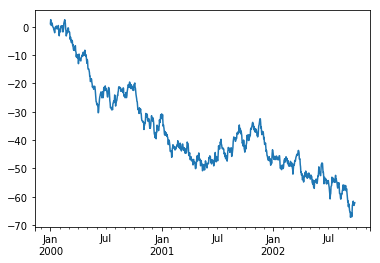

In [53]:
ts.plot()

### 在DataFrame中，plot()方法可以很方便地绘制出所有列标签下的数据：

In [54]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])

In [55]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

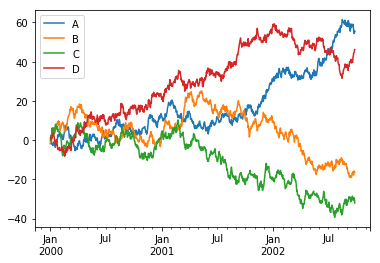

In [56]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 11.数据的导入和输出

### 11.1 CSV文件

### [保存为CSV文件](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [57]:
df.to_csv('foo.csv')

### [读取CSV文件](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [58]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.793806,-1.439573,-0.116765,1.078453
1,2000-01-02,-0.977361,1.680866,0.181192,0.387798
2,2000-01-03,-0.403201,0.980279,2.359307,0.778115
3,2000-01-04,0.276690,2.253842,1.523397,1.613605
4,2000-01-05,-1.127549,0.891669,3.286792,2.135944
5,2000-01-06,-1.722105,0.574160,4.676815,1.048442
6,2000-01-07,-2.300659,1.975162,6.166305,1.270135
7,2000-01-08,-1.986703,2.240946,4.567565,2.249473
8,2000-01-09,-2.751842,4.056325,4.794222,3.251098
9,2000-01-10,-2.414831,3.709938,6.191617,3.671819


### 11.2 HDF5文件

### 读写HDF5文件[HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)
### 写入HDF5存储：

In [59]:
df.to_hdf('foo.h5','df')

### 从HDF5存储中读取：

In [60]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.793806,-1.439573,-0.116765,1.078453
2000-01-02,-0.977361,1.680866,0.181192,0.387798
2000-01-03,-0.403201,0.980279,2.359307,0.778115
2000-01-04,0.276690,2.253842,1.523397,1.613605
2000-01-05,-1.127549,0.891669,3.286792,2.135944
2000-01-06,-1.722105,0.574160,4.676815,1.048442
2000-01-07,-2.300659,1.975162,6.166305,1.270135
2000-01-08,-1.986703,2.240946,4.567565,2.249473
2000-01-09,-2.751842,4.056325,4.794222,3.251098
2000-01-10,-2.414831,3.709938,6.191617,3.671819


### 11.3 Excel文件

### 读写Excel文件，请参看[MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)
### 写入excel文件：

In [61]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

### 从excel文件中读取：

In [62]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.793806,-1.439573,-0.116765,1.078453
2000-01-02,-0.977361,1.680866,0.181192,0.387798
2000-01-03,-0.403201,0.980279,2.359307,0.778115
2000-01-04,0.276690,2.253842,1.523397,1.613605
2000-01-05,-1.127549,0.891669,3.286792,2.135944
2000-01-06,-1.722105,0.574160,4.676815,1.048442
2000-01-07,-2.300659,1.975162,6.166305,1.270135
2000-01-08,-1.986703,2.240946,4.567565,2.249473
2000-01-09,-2.751842,4.056325,4.794222,3.251098
2000-01-10,-2.414831,3.709938,6.191617,3.671819


## 12.代码陷阱

### 某些操作可能你会看到类似这样的异常：

if pd.Series([False, True, False]):
    print("I was true")
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().

### 关于这些操作和说明，请查看[Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare)
### 也记得要看看[Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas)